In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [4]:
airtemps = xr.tutorial.load_dataset('air_temperature')
airtemps


<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 244.0 244.09999 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [5]:
air = airtemps.air - 273.15

In [6]:
air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[-31.949997, -30.649994, ..., -37.649994, -34.550003],
        [-29.350006, -28.649994, ..., -37.850006, -33.850006],
        ...,
        [ 22.75    ,  23.049988, ...,  22.75    ,  22.049988],
        [ 23.140015,  23.640015, ...,  23.640015,  23.450012]],

       [[-31.050003, -30.449997, ..., -39.550003, -37.350006],
        [-29.550003, -29.050003, ..., -40.649994, -37.449997],
        ...,
        [ 23.049988,  23.549988, ...,  22.350006,  21.950012],
        [ 23.140015,  24.049988, ...,  23.25    ,  23.450012]],

       ...,

       [[-27.36    , -28.36    , ..., -29.160004, -28.36    ],
        [-23.259995, -23.86    , ..., -30.660004, -28.86    ],
        ...,
        [ 23.140015,  24.040009, ...,  21.940002,  21.23999 ],
        [ 24.640015,  25.23999 , ...,  22.339996,  22.040009]],

       [[-28.059998, -28.86    , ..., -31.660004, -31.36    ],
        [-23.259995, -23.86    , ..., -32.86    , -31.460007],
    

In [7]:
air.attrs = airtemps.air.attrs


In [8]:
air.attrs['unit'] = 'deg C'

In [9]:
air2d = air.isel(time = 500)

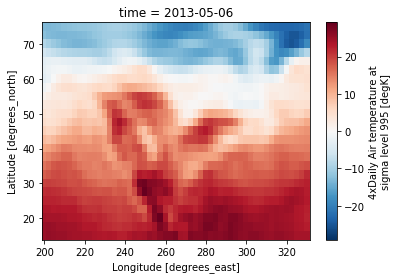

In [10]:
air2d.plot()

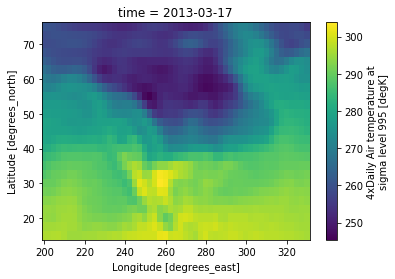

In [11]:
airtemps.air.isel(time=300).plot()

In [12]:
t = air.isel(time=slice(0, 365*4, 250))

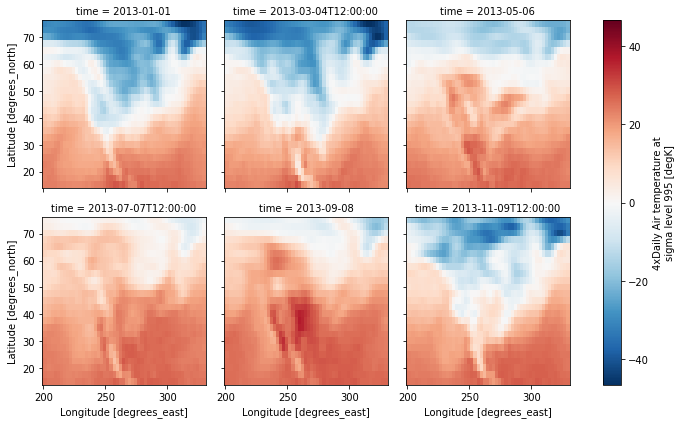

In [13]:
g_simple = t.plot(x='lon', y='lat', col='time', col_wrap=3)


In [14]:
np.random.seed(1)
x = 360 * np.random.rand(100)
y = 180 * np.random.rand(100) - 90

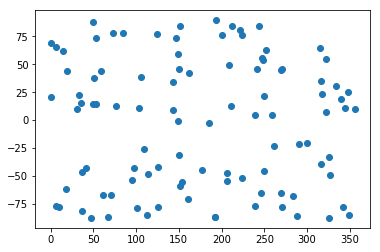

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)

In [16]:
lon = x
lat = y

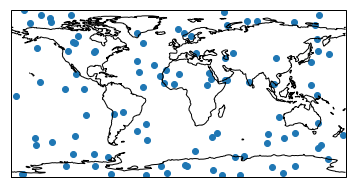

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()

[]

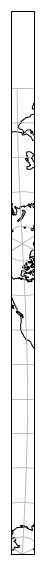

In [18]:
plt.figure(figsize=(3,10))
ax = plt.axes(projection=ccrs.UTM(zone=10))
ax.coastlines(resolution='110m')
ax.gridlines()
ax.plot()